In [1]:
import random
import time
import heapq
import math
import matplotlib.pyplot as plt

In [2]:
def generate_graph(n, extra_edges_multiplier=5):
    """
    Generate a random directed weighted graph with n nodes.
    The graph is stored as a dictionary: 
      graph[node] = list of (neighbor, weight) tuples.
    Ensures connectivity by first creating a spanning tree, then adds extra random edges.
    Total number of edges will be about extra_edges_multiplier * n.
    """
    graph = {i: [] for i in range(n)}
    
    # Create a spanning tree to ensure connectivity:
    nodes = list(range(n))
    random.shuffle(nodes)
    for i in range(n - 1):
        u = nodes[i]
        v = nodes[i + 1]
        weight = random.randint(1, 10)
        graph[u].append((v, weight))
    
    # Determine target total number of edges
    total_edges_target = extra_edges_multiplier * n
    current_edges = n - 1
    
    while current_edges < total_edges_target:
        u = random.randint(0, n - 1)
        v = random.randint(0, n - 1)
        # avoid self-loop; optionally avoid duplicate edge
        if u != v:
            weight = random.randint(1, 10)
            graph[u].append((v, weight))
            current_edges += 1
    return graph


In [3]:
def dijkstra(graph, source):
    """
    Compute shortest paths from source using Dijkstra's algorithm.
    Returns a dictionary: distances[node] = shortest distance from source.
    """
    n = len(graph)
    distances = {node: math.inf for node in graph}
    distances[source] = 0
    # Priority queue: (distance, node)
    heap = [(0, source)]
    
    while heap:
        current_dist, u = heapq.heappop(heap)
        if current_dist > distances[u]:
            continue  # Skip if a better path has been found
        for v, weight in graph[u]:
            distance = current_dist + weight
            if distance < distances[v]:
                distances[v] = distance
                heapq.heappush(heap, (distance, v))
    return distances

In [4]:
def bellman_ford(graph, source):
    """
    Compute shortest paths from source using the Bellman-Ford algorithm.
    Returns a dictionary: distances[node] = shortest distance from source.
    """
    n = len(graph)
    distances = {node: math.inf for node in graph}
    distances[source] = 0
    
    # Relax edges repeatedly (|V| - 1 times)
    for _ in range(n - 1):
        for u in graph:
            for v, weight in graph[u]:
                if distances[u] + weight < distances[v]:
                    distances[v] = distances[u] + weight
    return distances

In [5]:
# List of graph sizes to test
graph_sizes = [10, 50, 100, 200, 500, 1000]

# Lists to store measured times (in milliseconds)
times_dijkstra = []
times_bellman = []

# For reproducibility
random.seed(42)

for n in graph_sizes:
    graph = generate_graph(n, extra_edges_multiplier=5)
    source = 0  # choose the source node
    
    # Measure Dijkstra execution time
    start = time.perf_counter()
    dijkstra(graph, source)
    end = time.perf_counter()
    time_dij = (end - start) * 1000  # convert seconds to ms
    times_dijkstra.append(time_dij)
    
    # Measure Bellman-Ford execution time
    start = time.perf_counter()
    bellman_ford(graph, source)
    end = time.perf_counter()
    time_bf = (end - start) * 1000  # convert seconds to ms
    times_bellman.append(time_bf)
    
    print(f"Graph with {n} nodes: Dijkstra = {time_dij:.3f} ms, Bellman-Ford = {time_bf:.3f} ms")

Graph with 10 nodes: Dijkstra = 0.035 ms, Bellman-Ford = 0.078 ms
Graph with 50 nodes: Dijkstra = 0.099 ms, Bellman-Ford = 1.660 ms
Graph with 100 nodes: Dijkstra = 0.152 ms, Bellman-Ford = 5.711 ms
Graph with 200 nodes: Dijkstra = 0.308 ms, Bellman-Ford = 18.894 ms
Graph with 500 nodes: Dijkstra = 0.573 ms, Bellman-Ford = 89.695 ms
Graph with 1000 nodes: Dijkstra = 0.905 ms, Bellman-Ford = 323.315 ms


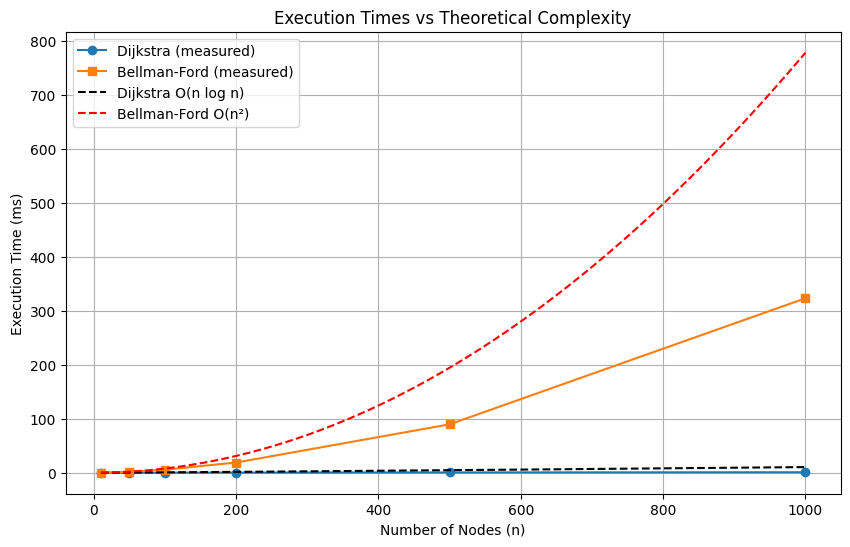

In [6]:
# Plot measured times
plt.figure(figsize=(10, 6))
plt.plot(graph_sizes, times_dijkstra, 'o-', label="Dijkstra (measured)")
plt.plot(graph_sizes, times_bellman, 's-', label="Bellman-Ford (measured)")

# Compute theoretical curves:
# For Dijkstra: assume time ~ c1 * n * log(n)
# For Bellman-Ford: assume time ~ c2 * n^2

# Determine scaling factors using the smallest size (graph_sizes[0])
n0 = graph_sizes[0]
c1 = times_dijkstra[0] / (n0 * math.log(n0))
c2 = times_bellman[0] / (n0 ** 2)

# Generate theoretical curves
n_vals = range(min(graph_sizes), max(graph_sizes) + 1)
theory_dij = [c1 * n * math.log(n) for n in n_vals]
theory_bf = [c2 * (n ** 2) for n in n_vals]

plt.plot(n_vals, theory_dij, 'k--', label="Dijkstra O(n log n)")
plt.plot(n_vals, theory_bf, 'r--', label="Bellman-Ford O(n²)")

plt.xlabel("Number of Nodes (n)")
plt.ylabel("Execution Time (ms)")
plt.title("Execution Times vs Theoretical Complexity")
plt.legend()
plt.grid(True)
plt.show()